In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from PIL import Image
import os
import matplotlib.pyplot as plt
import collections

# Representación de un grafo

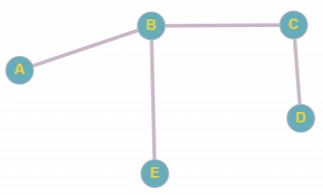

In [2]:
Image.open('ej1.png')

##### a) Escriba la matriz de adyacencia, la lista de aristas y la lista de adyacencia de $G$.

In [3]:
print('Matriz de adyacencia')
pd.DataFrame({
    'A':[0,1,0,0,0],
    'B':[1,0,1,0,1],
    'C':[0,1,0,1,0],
    'D':[0,0,1,0,0],
    'E':[0,1,0,0,0]
}, index = ['A','B','C', 'D','E'])

Matriz de adyacencia


,A,B,C,D,E
A,0,1,0,0,0
B,1,0,1,0,1
C,0,1,0,1,0
D,0,0,1,0,0
E,0,1,0,0,0


In [4]:
lista_aristas = [{'A','B'},{'B','C'},{'B','E'},{'C','D'}]
print('Lista de aristas\nG = {'+str(lista_aristas).replace('[','').replace(']','')+'}')   

Lista de aristas
G = {{'A', 'B'}, {'C', 'B'}, {'B', 'E'}, {'C', 'D'}}


In [5]:
lista_adyacencia = {'A': 'B','B': 'A C E', 'C':'B D','D':'C','E':'B'}
print('Lista de adyacencia')
for i in lista_adyacencia:
    print(i,':', lista_adyacencia[i])

Lista de adyacencia
A : B
B : A C E
C : B D
D : C
E : B


##### b ) Usando el paquete Networkx de Python reproduzca el grafo $G$. Para esto cree un archivo de texto que contenga la lista de aristas y otro archivo que contenga la lista de adyacencia de $G$ (lea la documentación para saber cual es el formato que dichos archivos deben tener). A continuación genere los grafos $G_1$ y $G_2$ a través de la lectura del archivo de la lista de aristas y la lista de adyacencia, respectivamente. Finalmente grafique $G_1$ y $G_2$, verificando así que ambas representaciones generan grafos equivalentes entre sí y con $G$.

Se crean el archivo "edge_list.edgelist" a partir de la lista de aristas generada en la pregunta anterior, que se almacenó en la variable "lista_aristas". También se crea el archivo "adyacency_list.adjlist" a partir de la lista de adyacencia creada en la pregunta anterior, que se almacenó en la variable "lista_adyacencia".
Luego, para leer estas listas se utilizan las funciones "nx.read_edgelist" y "nx.read_adjlist", respectivamente.

In [6]:
################################G1################################
file = open("edge_list.edgelist", "w")
for i in lista_aristas:
    file.write(str(i)[2]+' '+str(i)[-3]+ os.linesep)
file.close()
G1 = nx.read_edgelist("edge_list.edgelist")
pos1 = nx.spring_layout(G1, seed = 312)
################################G2################################
file = open("adyacency_list.adjlist", "w")
for i in lista_adyacencia:
    file.write(i +' '+lista_adyacencia[i] + os.linesep)
file.close()
G2 = nx.read_adjlist("adyacency_list.adjlist")
pos2 = nx.spring_layout(G2, seed = 312)

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


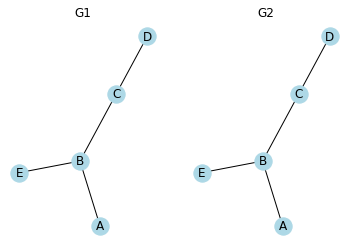

In [7]:
########################Gráficas G1 y G2##########################
plt.subplot(121)
plt.title('G1')
nx.draw(G1, pos = pos1, with_labels=True, node_color = 'lightblue') 
plt.subplot(122)
plt.title('G2')
nx.draw(G2, pos = pos2, with_labels=True, node_color = 'lightblue') 
plt.show();

##### c ) Usando el paquete Networkx obtenga la matriz de adyacencia de $G_1$ y a partir de ella encuentre el grado de cada nodo de $G$. **Hint** : El grado del nodo $i-ésimo$ de $G$, denotado por $k_i$ se puede obtener a través de la expresión $k_i = \sum_{j=1}^{n} A_{ij}$ , con $n$ el número de nodos del grafo y $A_{ij}$ representando al elemento situado en la fila $i$, columna $j$ de la matriz de adyacencia.

Primero, se ordenarán los nodos de forma arbitraria, en este caso, por orden alfabético. Luego se utilizará la función "adjacency_matrix" del paquete Networkx para obtener la matriz y el método "todense" para imprimirla en forma de matriz.
Finalmente, se recorrerá la matriz para ir sumando sobre sus columnas y de esa forma se obtendrá el grado por cada nodo. También podría realizarse por fila, ya que la matriz de adyacencia es simétrica.

In [8]:
nodos_ordenados = ['A','B','C','D','E']
matrix = nx.adjacency_matrix(G1, nodelist=nodos_ordenados)
print('Matriz de adyacencia\n',matrix.todense())

Matriz de adyacencia
 [[0 1 0 0 0]
 [1 0 1 0 1]
 [0 1 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]]


In [9]:
for i in range(len(G1.nodes)):
    print('El nodo ' +nodos_ordenados[i]+' tiene grado '+str(matrix.sum(0)[0,i])+', es decir, k_'+
          nodos_ordenados[i]+' = '+str(matrix.sum(0)[0,i]))

El nodo A tiene grado 1, es decir, k_A = 1
El nodo B tiene grado 3, es decir, k_B = 3
El nodo C tiene grado 2, es decir, k_C = 2
El nodo D tiene grado 1, es decir, k_D = 1
El nodo E tiene grado 1, es decir, k_E = 1


##### d) Grafique el histograma de los grados del grafo. Use los grados obtenidos en el item anterior.

Primero se obtienen los grados de cada nodo con el método "degree" del paquete Networkx y se ordenan en forma descendente. Luego se cuentan a través del método "Counter" del paquete Collections, que genera un diccionario donde la llave es el grado y el valor es la cantidad de nodos que tienen ese grado. Los valores anteriores se guardan en las variables "deg" y "cnt" respectivamente.

Grados en secuencia descendente [3, 2, 1, 1, 1]


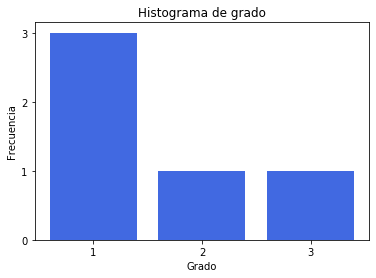

In [10]:
degree_sequence = sorted([d for n, d in G1.degree()], reverse=True)
print ("Grados en secuencia descendente", degree_sequence)
degreeCount = collections.Counter(degree_sequence) 
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
#plt.figure(figzise=(5,4))
plt.bar(deg, cnt, align='center', color='royalblue')
plt.title("Histograma de grado")
plt.ylabel("Frecuencia")
plt.xlabel("Grado")
ax.set_yticks([0,1,2,3])
ax.set_xticks([d + 0 for d in deg])
ax.set_xticklabels(deg)

plt.show();

# Clustering local versus global
##### Considere el siguiente grafo $G$:

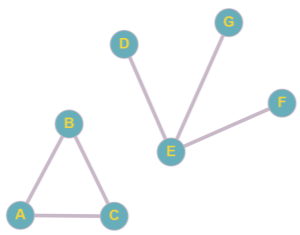

In [11]:
Image.open('ej2.PNG')

##### a) Calcule el coeficiente de clustering $C = \frac{1}{n} \sum_{i = 1}^{n} C_i$ y el coeficiente de clustering global o transitividad $T = \frac{3\ \times\  \#triangulos}{\#tríadas}$  del grafo.

In [12]:
C_A = (2*1)/(2*(2-1))
C_B = (2*1)/(2*(2-1))
C_C = (2*1)/(2*(2-1))
C_D = 0
C_E = 0
C_F = 0
C_G = 0
C = 1/7 * (C_A + C_B + C_C + C_D + C_E + C_F + C_G)

In [13]:
n_triangulos = 1
triadas = ['A-C-B', 'C-B-A', 'B-A-C', 'D-E-F', 'D-E-G', 'G-E-F']
n_triadas = len(triadas)
T = (3 * n_triangulos)/ n_triadas

In [14]:
print('El coeficiente de clustering es: ', C)
print('El coeficiente de clustering global o transitividad es: ', T)

El coeficiente de clustering es:  0.42857142857142855
El coeficiente de clustering global o transitividad es:  0.5


##### b) ¿Qué ocurre con los coeficientes si se le agrega un nodo aislado? Como por ejemplo en el grafo $H$:

In [15]:
C_H = 0
C = 1/8 * (C_A + C_B + C_C + C_D + C_E + C_F + C_G + C_H)
n_triangulos = 1
triadas = ['A-C-B', 'C-B-A', 'B-A-C', 'D-E-F', 'D-E-G', 'G-E-F']
n_triadas = len(triadas)
T = (3 * n_triangulos)/ n_triadas

In [16]:
print('El coeficiente de clustering es: ', C)
print('El coeficiente de clustering global o transitividad es: ', T)

El coeficiente de clustering es:  0.375
El coeficiente de clustering global o transitividad es:  0.5


Se observa que al agregar un nodo aislado, el coeficiente de clustering disminuye. Esto tiene sentido, ya que el nuevo nodo, al no estar conectado a los nodos anteriores, probablemente no pertenezca a ninguno de los grupos (ya sea porque es ruido o porque pertenece a otro cluster que no se puede ver con las observaciones disponibles).

##### c) Usando el paquete Networkx obtenga los grafos $G$ y $H$, puede usar la representación que usted prefiera para crearlos, pero hágalo sin crear archivos adicionales como en la pregunta 1 (revise la documentación de Networkx para saber cómo hacerlo).

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


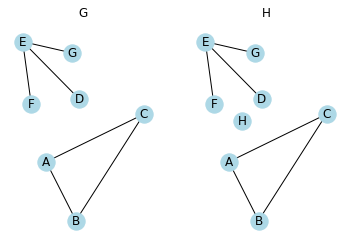

In [17]:
G_2 = nx.Graph()
nodos_g = ['A','B','C','D','E','F','G']
G_2.add_nodes_from(nodos_g)
G_2.add_edges_from([('A','B'),('B','C'),('A','C'),('D','E'),('E','G'),('E','F')])
pos_g2 = nx.random_layout(G_2, seed = 312)
plt.subplot(121)
plt.title('G')
G_2graph = nx.draw(G_2, pos =pos_g2, with_labels=True, node_color = 'lightblue')

H = nx.Graph()
nodos_h = ['A','B','C','D','E','F','G', 'H']
H.add_nodes_from(nodos_h)
H.add_edges_from([('A','B'),('B','C'),('A','C'),('D','E'),('E','G'),('E','F')])
pos_h=nx.random_layout(H, seed = 312)
plt.subplot(122)
plt.title('H')
H_graph = nx.draw(H, pos =pos_h, with_labels=True, node_color = 'lightblue')
plt.show();

##### d) Usando el paquete Networkx encuentre el coeficiente de clustering y la transitividad del grafo $G$ y del grafo $H.$

In [18]:
C_G_2 = nx.average_clustering(G_2)
C_H = nx.average_clustering(H)
T_G_2 = nx.transitivity(G_2)
T_H = nx.transitivity(H)
print('Coeficiente de clustering G: ',C_G_2 )
print('Coeficiente de clustering H: ',C_H )
print('Coeficiente de transitividad G: ',T_G_2 )
print('Coeficiente de transitividad H: ',T_H )

Coeficiente de clustering G:  0.42857142857142855
Coeficiente de clustering H:  0.375
Coeficiente de transitividad G:  0.5
Coeficiente de transitividad H:  0.5


Se observa que los resultados calculados a mano en las preguntas a) y b), y los obtenidos a través del paquete Networkx coinciden.

# Redes Dispersas
##### Sea $G$ un grafo simple, es decir no dirigido, sin loops, sin peso y con una sola arista entre vértices.
##### a) Sea $L$ la cantidad de aristas de $G$. Exprese la suma de los grados de cada vértice en $G$, en términos de $L.$

Bajo las condiciones anteriores, sea $k_i$ el grado del nodo $i-ésimo$, $n$ la cantidad de nodos y $L$ la cantidad de aristas, entonces la suma de los grados de cada vértice en $G$ en términos de $L$ puede expresarse como:
$$\sum_{i=1}^{n} k_i = 2 L $$

##### b) Calcule $< k >$, el promedio del grado de los vértices de $G$.

Siendo $k_i$ el grado del nodo $i-ésimo$, $n$ la cantidad de nodos y $L$ la cantidad de aristas, entonces el promedio del grado de los vértices de $G$ puede expresarse como:
$$<𝑘> = \frac{2L}{n}$$

##### c) Sea $n$ la cantidad de vértices de $G$. Determine la cantidad máxima de aristas, $Lmax$, que $G$ puede tener. Hint: Puede pensar el cálculo de las aristas como un problema de combinatoria o puede contar los elementos de la matriz de adyacencia.


Similar a como se calcula la cantidad de diagonales máximas en un polígono de $n$ lados $D_{max} = \frac{n(n-3)}{2}$, en una red $G$ de $n$ nodos (o vértices), la cantidad máxima de aristas que pueden existir está dada por una fórmula similar, pero dado que en el polígono se descuentan los "lados" del mismo (n-3) en este caso no deben descontarse ya que son aristas (n-1):
$$L_{max} = \frac{n(n-1)}{2}$$

##### d) Obtenga la densidad $ρ$ de $G$, que corresponde a la fracción de aristas que existe en el grafo, en contraste con la cantidad máxima posible. Escribalo en términos de $< k >$ y $n$.

Dada la definición de $ρ$, se tiene que:
$$ρ = \frac{aristas\ en\ G}{aristas\ máximas\ en\ G} = \frac{L}{L_{max}}$$
Del cálculo de $<𝑘>$ en el ejercicio b se tiene que:
$$<𝑘> = \frac{2L}{n} \ \ \Rightarrow\ \  L = \frac{n<𝑘>}{2}$$
Luego:
$$ρ = \frac{L}{L_{max}} = \frac {\frac{n<𝑘>}{2}}{\frac{n(n-1)}{2}} = \frac {<𝑘>}{(n-1)} $$
Por lo tanto, $$ρ = \frac {<𝑘>}{(n-1)} $$

##### e) En la mayoría de las redes reales ocurre que $ρ$ es cercano a 0, o equivalentemente $L << Lmax$. ¿Por qué cree que ocurre este fenómeno? Dé un ejemplo de una red con este comportamiento.


Creo que en la mayoría de los casos que se estudian a través de redes, el número de aristas es muy inferior al número de aristas máximas, porque por ejemplo, en fenómenos sociales, lo normal es que las personas formen grupos con simpatizantes o se identifican y relacionan con individuos de características determinadas. Esto se traduciría en que al momento de establecer "aristas" para reflejar este tipo de relaciones, habrán "aristas inexistentes". Por otra parte, al estudiar conectividad a través de vuelos, carreteras, llamadas, etc, hay que considerar que estas aristas tienen un **costo**, y por tanto, el número teórico de aristas máximas será muy superior al número de aristas que se pueden alcanzar.

# Circular layout
##### Sea $K_n$ un grafo completo de $n$ vértices, es decir un grafo simple en donde todos los nodos están conectados entre si.
##### a) Dibuje $K_1$, $K_2$, $K_3$, $K_4$, y $K_5$. Hint: $K_n$ tiene una representación visualmente atractiva si se representa como un polígono regular de n vértices, Ej: $K_8$ se asemeja a un octágono.


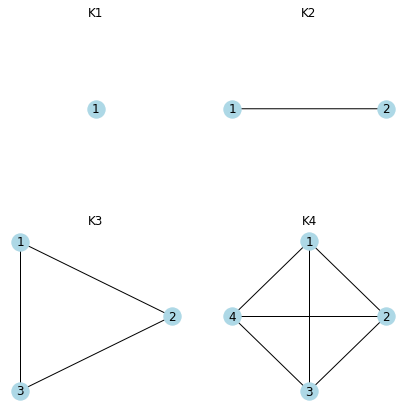

In [19]:
K1 = nx.complete_graph(1)
K2 = nx.complete_graph(2)
K3 = nx.complete_graph(3)
K4 = nx.complete_graph(4)
posk1 = nx.circular_layout(K1)
posk2 = nx.circular_layout(K2)
posk3 = nx.circular_layout(K3)
posk4 = nx.circular_layout(K4)
plt.figure(figsize=(7,7))
plt.subplot(221)
plt.title('K1')
nx.draw(K1, with_labels=True, pos = posk1, labels = {0: '1'}, node_color = 'lightblue') 
plt.subplot(222)
plt.title('K2')
nx.draw(K2, with_labels=True, pos = posk2, labels = {0: '2', 1 : '1'}, node_color = 'lightblue')
plt.subplot(223)
plt.title('K3')
nx.draw(K3, with_labels=True, pos = posk3, labels = {0: '2', 1: '1', 2: '3'}, node_color = 'lightblue')
plt.subplot(224)
plt.title('K4')
nx.draw(K4, with_labels=True, pos = posk4, labels = {0: '2', 1 : '1', 2:'4', 3:'3'},node_color = 'lightblue') 
plt.show();

##### b) ¿Cuántas aristas tiene $K_n$?

La cantidad máxima de aristas de un grafo completo se calcula de manera similar a la cantidad de diagonales de un polígono, pero dado que en el polígono se descuentan los "lados" del mismo (n-3) en este caso no deben descontarse ya que son aristas (n-1):
$$Aristas\ de\ K_n = \frac{n(n-1)}{2}$$

##### c) Imagine que los polígonos del primer inciso están inscritos en una circunferencia. Usted podrá notar que conforme crece $n$, el perímetro del polígono contenido en la circunferencia se asemeja cada vez más al perímetro de ella. Teniendo esto en cuenta, dibuje $K_n$ cuando $n → ∞$.


A medida que aumenta $n$, los nodos van quedando cada vez más juntos formando un perímetro de circunferencia, pero también se van dibujando aristas entre nodos que no son vecinos inmediatos y, por tanto, estas aristas quedan expresadas como $cuerdas$ de la cirunferencia. 
Entonces cuando $n → ∞$ debe apreciarse un perímetro de circunferencia conformado por nodos (parte celeste de la figura) y un área interior llena de cuerdas (parte negra de la figura), que son las aristas entre esos nodos.
A modo de ejemplo, se presenta cómo se visualiza lo anteriormente explicado cuando $n$ es muy grande:

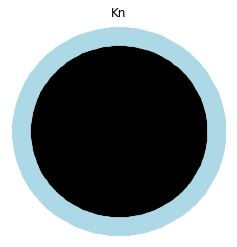

In [20]:
Kn = nx.complete_graph(300)
poskn = nx.circular_layout(Kn)
plt.figure(figsize=(4,4))
plt.title('Kn')
nx.draw(Kn, with_labels=False, pos = poskn, node_color = 'lightblue') 

# Igualdad de grafos
##### Un isomorfismo entre dos grafos $G$ y $H$ es una función que transforma los nombres de los nodos de $G$ a nombres de nodos en $H$, pero preservando las relaciones entre las aristas de $G$. Esto último tiene una implicancia profunda: un isomorfismo preserva la estructura completa de $G$, es decir, su cantidad de aristas, la distribución de los grados, la cantidad de ciclos, etc. Toda propiedad estructural que tenga el grafo $G$ se preserva en el grafo $H$. Se dice que dos grafos son isomorfos si existe un isomorfismo entre ellos, por ejemplo:

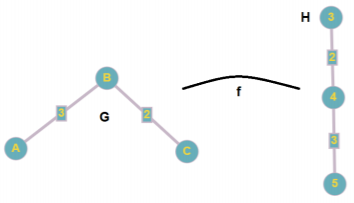

In [21]:
Image.open('ej5.png')

##### En este caso, la función que representa el isomorfismo es explícitamente $f(A) = 5, f(B) = 4 y f(C) = 3$. Luego $G$ y $H$ son isomorfos.

##### a) Determine si el grafo de la pregunta 1 es isomorfo a:

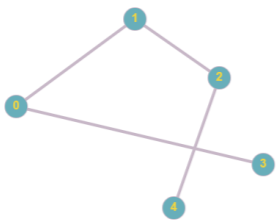

In [22]:
Image.open('ej5a.PNG')

El grafo de la pregunta 1 no es isomorfo a este grafo, porque éste no contiene la misma información que el primero. Si bien ambos grafos contienen la misma cantidad de nodos (5), el primer grafo contiene un nodo con grado 3, que es el nodo B, a diferencia de este grafo, donde los nodos de mayor grado son de grado 2. Por lo tanto, contienen información distinta y no son isomorfos.

##### b) Se denomina automorfismo de un grafo $G$ a un isomorfismo que va desde $G$ en si mismo. Es decir, un automorfismo es un reordenamiento de los nombres de los vértices de G, cuidando de que la estructura del grafo se preserve. Determine cuántos automorfismos existen en $K_1$, $K_2$ y $K_3$.

$K_1$ sólo contiene un vértice, por tanto, $\# automorfismos = 0$.

$K_2$ contiene dos vértices y por combinatoria se puede obtener que sólo existen dos formas de ordenar dos nodos, por tanto, $\# automorfismos = 2! = 1\ \cdot \ 2 = 2$.

$K_3$ contiene dos vértices y por combinatoria se puede obtener que sólo existen dos formas de ordenar dos nodos, por tanto, $\# automorfismos = 3! = 1\ \cdot \ 2 \ \cdot \ 3 = 6$.


##### c) Determine la cantidad de automorfismos posibles que tiene Kn.

Dado el patrón anterior, $K_n$ tiene $n!$ automorfismos. En la pregunta anterior ya lo había abordado como combinatoria, para ver cuántas formas tienen de ordenarse los nodos, pero me di cuenta de que también se puede observar desde la matriz de adyacencia, calculando de cuántas formas se pueden ordenar las filas. Llegué también al enfoque de combinatoria.